In [1]:
#import libraries
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download SPX data from 1980 to the present using yfinance
# To change index, change the ticker symbol, visit https://finance.yahoo.com/lookup for tickers.
data = yf.download('^GSPC', start='1980-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Calculate the daily percent return
data['Return'] = data['Adj Close'].pct_change()

In [4]:
# Create columns for month and day to facilitate aggregation
data['Month'] = data.index.month
data['Day'] = data.index.day

In [5]:
# Group by Month and Day and calculate the mean return
average_returns = data.groupby(['Month', 'Day'])['Return'].mean().reset_index()

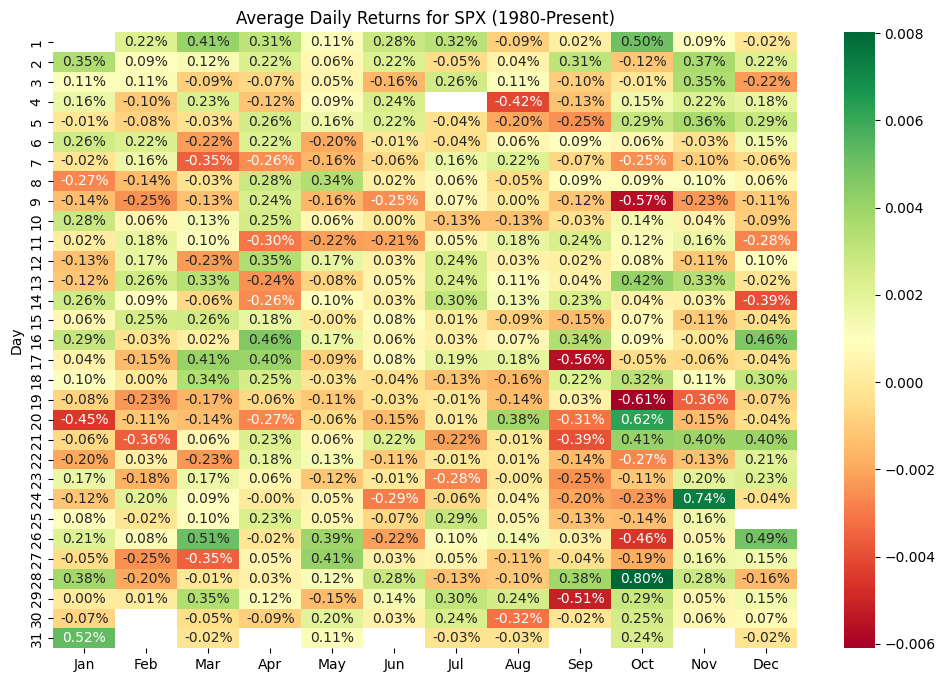

In [6]:
# Pivot the dataframe for heatmap
heatmap_data = average_returns.pivot(index="Day", columns="Month", values="Return")

# Set month names for better clarity
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data.columns = months

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, fmt=".2%")
plt.title('Average Daily Returns for SPX (1980-Present)')
plt.show()

In [7]:
# Group by Month and Day and calculate the mean return
average_returns = data.groupby(['Month', 'Day'])['Return'].mean().reset_index()

# Convert the Month number to its corresponding name for better readability
average_returns['Month'] = average_returns['Month'].apply(lambda x: months[x-1])

# Pivot the dataframe for display
display_df = average_returns.pivot("Day", "Month", "Return")


C:\Users\hiimd\AppData\Local\Temp\ipykernel_23284\3364168910.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  display_df = average_returns.pivot("Day", "Month", "Return")


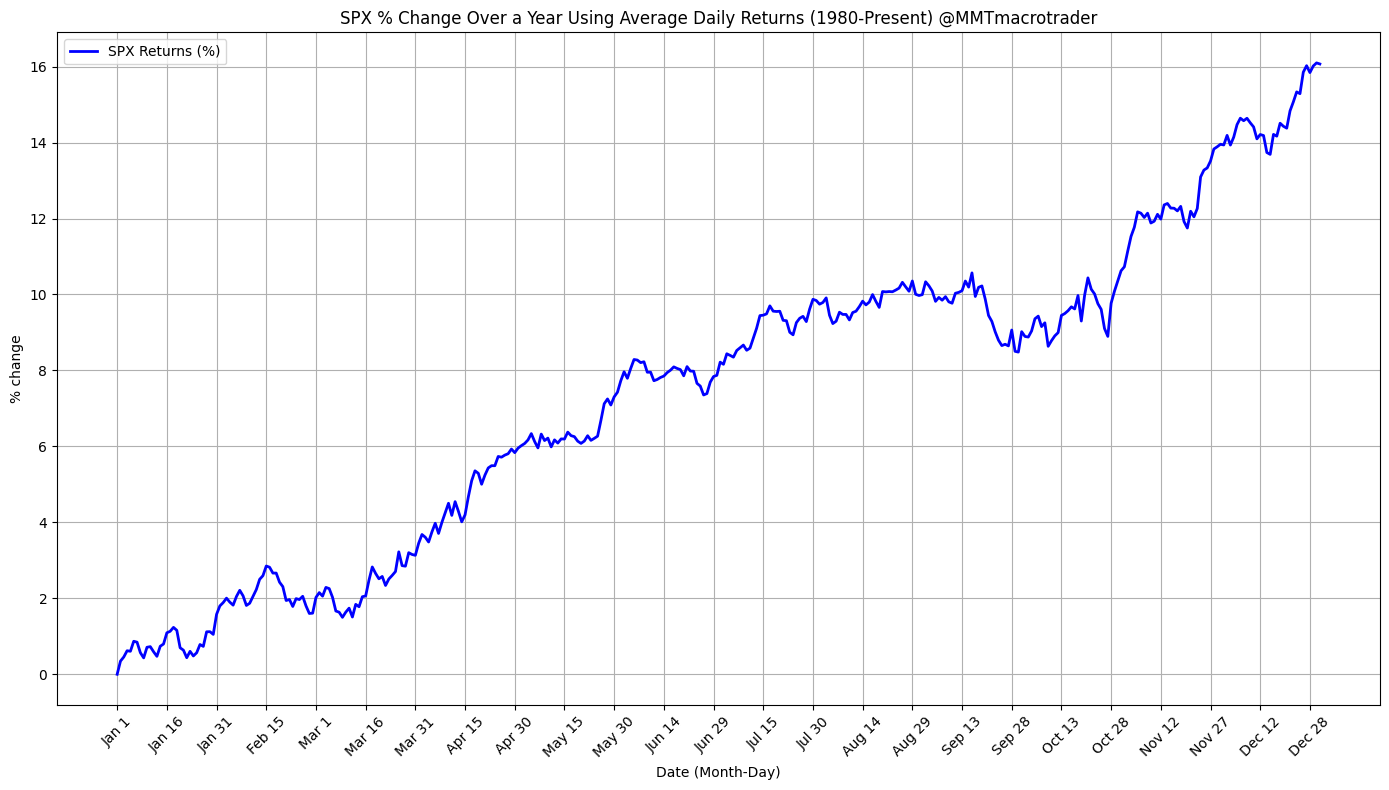

In [8]:
#Create a simulated yearly balance based on average daily returns

def simulate_yearly_balance(df, starting_balance=100000):
    """Simulates the yearly balance given a DataFrame of average daily returns."""
    balances = [starting_balance]  # Start with the initial balance
    dates = ["Jan 1"]  # Start with the initial date

    # Iterate over each average return and calculate the daily balance
    for month in months:
        for day in range(1, 32):
            # Some days like Feb 29 might not exist in certain months or the average_returns df
            if (month, day) in df.index:
                daily_return = df.loc[(month, day), 'Return']
                new_balance = balances[-1] + (balances[-1] * daily_return)
                balances.append(new_balance)
                
                # Add the month-day to the dates list
                dates.append(f"{month} {day}")

    return balances, dates

# Prepare the data for simulation by setting month and day as index
prepared_df = average_returns.set_index(['Month', 'Day'])

# Calculate the simulated balances and associated dates
balances, dates = simulate_yearly_balance(prepared_df)

# Convert balances to percentage change from the starting balance
percentage_changes = [(bal - 100000) / 100000 * 100 for bal in balances]

# Plot the simulated account balance trajectory in percentage
plt.figure(figsize=(14, 8))
plt.plot(dates, percentage_changes, label='SPX Returns (%)', color='blue', linewidth=2)
plt.title('SPX % Change Over a Year Using Average Daily Returns (1980-Present) @MMTmacrotrader')
plt.xlabel('Date (Month-Day)')
plt.ylabel('% change')
plt.xticks(dates[::15], rotation=45)  # Display every 15th date for better legibility
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


In [9]:
# create new variable for SPX 10 day average - Download SPX data from 1980 to the present
data2 = yf.download('^GSPC', start='1980-01-01')


[*********************100%***********************]  1 of 1 completed


In [10]:
# Calculate the 10-day return for each date relative to the date 10 days prior
data2['10-Day Return2'] = data2['Adj Close'] / data2['Adj Close'].shift(10) - 1


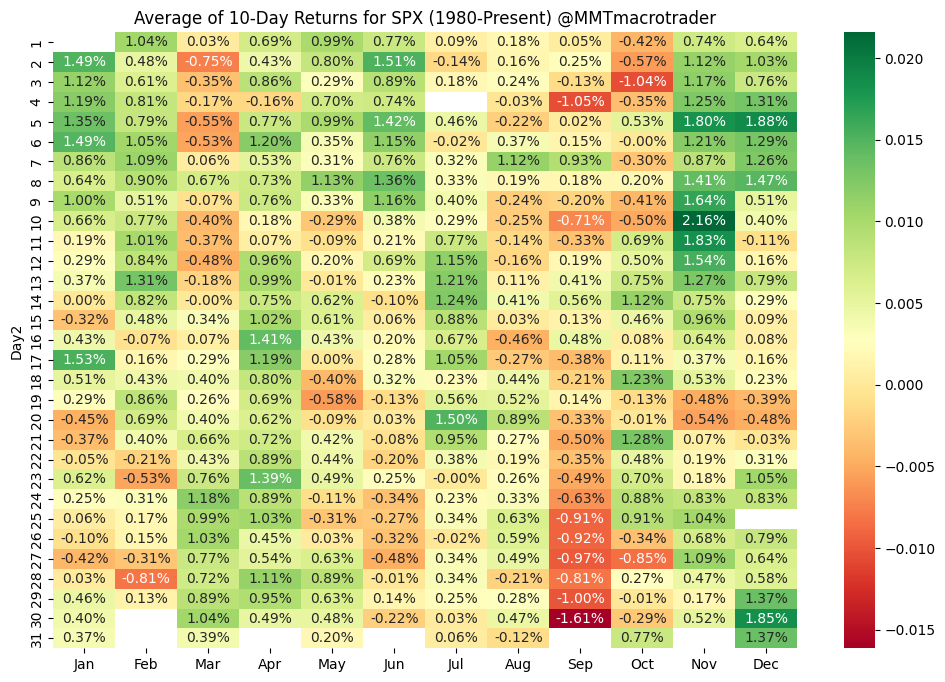

In [11]:
# Create columns for month and day to facilitate aggregation
data2['Month2'] = data2.index.month
data2['Day2'] = data2.index.day

# Group by Month and Day and calculate the mean of the 10-day returns
average_returns2 = data2.groupby(['Month2', 'Day2'])['10-Day Return2'].mean().reset_index()
# Pivot the dataframe for heatmap
heatmap_data2 = average_returns2.pivot(index="Day2", columns="Month2", values="10-Day Return2")

# Set month names for better clarity
months2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data2.columns = months2

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data2, cmap='RdYlGn', annot=True, fmt=".2%")
plt.title('Average of 10-Day Returns for SPX (1980-Present) @MMTmacrotrader')
plt.show()
